<a href="https://colab.research.google.com/github/seonae0223/machine_learning/blob/main/10_%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')  # ÏÇ¨Ïù¥ÌÇ∑Îü∞ 1.2 Î∂ÄÌÑ∞Îäî Î≥¥Ïä§ÌÑ¥ Ï£ºÌÉùÍ∞ÄÍ≤© Îç∞Ïù¥ÌÑ∞Í∞Ä ÏóÜÏñ¥ÏßÑÎã§Îäî warning Î©îÏãúÏßÄ Ï∂úÎ†• Ï†úÍ±∞

In [47]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [48]:
boston_df = pd.DataFrame(
    data=data,
    columns=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
)

boston_df['PRICE']=target
boston_df

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  PRICE  
0       15.3  396.90   4.98   24.0  
1       17.8  396.90   9.14   21.6  
2       17.8  392.83   4.03   34.7  
3       18.7  394.63   2.94   33.4  
4       18.7  396.90   5.33   36.2  
..       ...     ...    ...    ...  
501     21.0  391.99   9.67   22.4  
502     21.0  396.90   9.08   20.6  
503     21.0  396.90   5.64   23.9  
504     21.0  393.45   6.48   22.0  
505     21.0  396.90   7.88   11.9  

[506 rows x 14 columns]

* CRIM: ÏßÄÏó≠Î≥Ñ Î≤îÏ£Ñ Î∞úÏÉùÎ•†  
* ZN: 25,000ÌèâÎ∞©ÌîºÌä∏Î•º Ï¥àÍ≥ºÌïòÎäî Í±∞Ï£º ÏßÄÏó≠Ïùò ÎπÑÏú®
* INDUS: ÎπÑÏÉÅÏóÖ ÏßÄÏó≠ ÎÑìÏù¥ ÎπÑÏú®
* CHAS: Ï∞∞Ïä§Í∞ïÏóê ÎåÄÌïú ÎçîÎØ∏ Î≥ÄÏàò(Í∞ïÏùò Í≤ΩÍ≥ÑÏóê ÏúÑÏπòÌïú Í≤ΩÏö∞Îäî 1, ÏïÑÎãàÎ©¥ 0)
* NOX: ÏùºÏÇ∞ÌôîÏßàÏÜå ÎÜçÎèÑ
* RM: Í±∞Ï£ºÌï† Ïàò ÏûàÎäî Î∞© Í∞úÏàò
* AGE: 1940ÎÖÑ Ïù¥Ï†ÑÏóê Í±¥Ï∂ïÎêú ÏÜåÏú† Ï£ºÌÉùÏùò ÎπÑÏú®
* DIS: 5Í∞ú Ï£ºÏöî Í≥†Ïö©ÏÑºÌÑ∞ÍπåÏßÄÏùò Í∞ÄÏ§ë Í±∞Î¶¨
* RAD: Í≥†ÏÜçÎèÑÎ°ú Ï†ëÍ∑º Ïö©Ïù¥ÎèÑ
* TAX: 10,000Îã¨Îü¨Îãπ Ïû¨ÏÇ∞ÏÑ∏Ïú®
* PTRATIO: ÏßÄÏó≠Ïùò ÍµêÏÇ¨ÏôÄ ÌïôÏÉù Ïàò ÎπÑÏú®
* B: ÏßÄÏó≠Ïùò ÌùëÏù∏ Í±∞Ï£º ÎπÑÏú®
* LSTAT: ÌïòÏúÑ Í≥ÑÏ∏µÏùò ÎπÑÏú®
* MEDV: Î≥∏Ïù∏ ÏÜåÏú†Ïùò Ï£ºÌÉù Í∞ÄÍ≤©(Ï§ëÏïôÍ∞í)

# Îç∞Ïù¥ÌÑ∞Ïùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌôïÏù∏
- Feature(X)ÏôÄ Target(y)Ïùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º Î∂ÑÏÑù
- ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÏßÄÏàòÍ∞Ä ÎÜíÏùÄ FeatureÎäî TargetÏùÑ ÏòàÏ∏° ÌïòÎäîÎç∞ Ï§ëÏöîÌïú FeatureÍ∞Ä Îê† Í≤ÉÏù¥Îã§.

In [35]:
# Ïßë Í∞í PRICEÏôÄ Îã§Î•∏ FeatureÏôÄÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑù
boston_df.corr()['PRICE'].sort_values()

LSTAT     -0.737663
PTRATIO   -0.507787
INDUS     -0.483725
TAX       -0.468536
NOX       -0.427321
CRIM      -0.388305
RAD       -0.381626
AGE       -0.376955
CHAS       0.175260
DIS        0.249929
B          0.333461
ZN         0.360445
RM         0.695360
PRICE      1.000000
Name: PRICE, dtype: float64

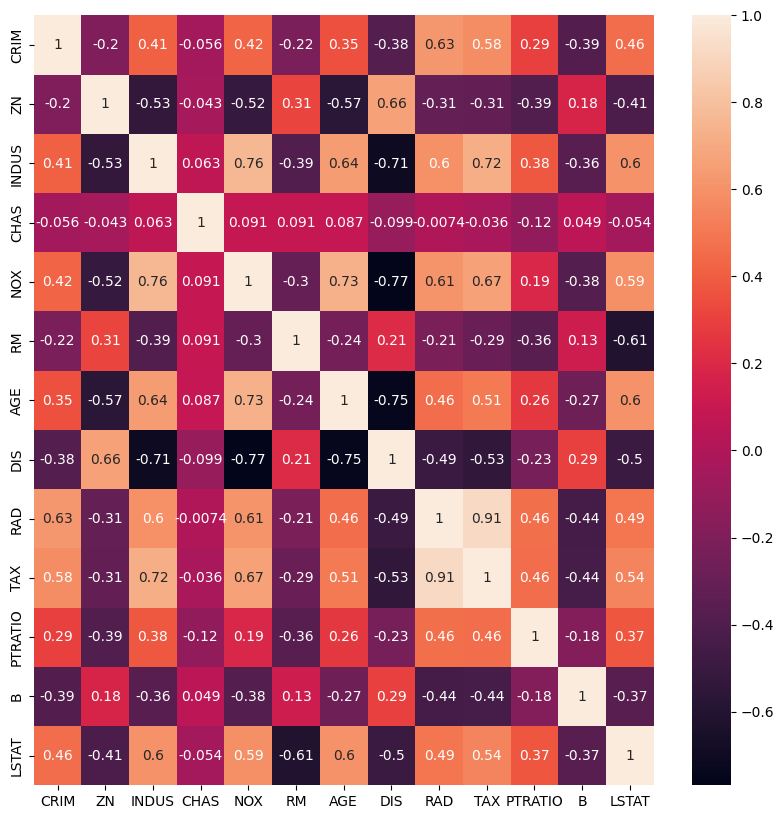

In [36]:
# Feature ÎÅºÎ¶¨Ïùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌôïÏù∏ - ÎÑàÎ¨¥ Í∞ïÌïú ÏÉÅÍ¥ÄÏÑ±ÏùÑ Í∞ÄÏßÑ Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏. (Îã§Ï§ëÍ≥µÏÑ†ÏÑ± ÌôïÏù∏)

plt.figure(figsize=(10,10))

corr_df = boston_df.drop('PRICE', axis=1).corr()
sns.heatmap(
    data=corr_df,
    annot=True,
)

plt.show()

## Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(
    boston_df.drop('PRICE', axis=1),
    boston_df['PRICE'],
    test_size=0.2,
    random_state=42
)

# Î™®Îç∏ ÌõàÎ†®

In [38]:
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

LinearRegression()

##ÏòàÏ∏°

In [39]:
y_pred = lr_reg.predict(X_test)
y_pred[:3]

array([28.99672362, 36.02556534, 14.81694405])

## ÌèâÍ∞Ä
- Ïò§Ï∞® Íµ¨ÌïòÍ∏∞

In [40]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


print("MSE : {:.3f}".format(mse))
print("RMSE : {:.3f}".format(rmse))
print("R2 : {:.3f}".format(r2))

MSE : 24.291
RMSE : 4.929
R2 : 0.669


RMSE(Ïò§Ï∞®)Ïùò Í∞íÏù¥ Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞Ïùò ÌëúÏ§ÄÌé∏Ï∞®Î≥¥Îã§ ÏûëÏúºÎ©¥ Í¥úÏ∞ÆÏùÄ Í∞íÏù¥Îã§.

üìå ÌëúÏ§ÄÌé∏Ï∞®
- Ï§ëÏïô Í∞íÏùÑ Í∏∞Ï§ÄÏúºÎ°ú Ïùå(-)Í≥º Ïñë(+)Ïùò Î∞©Ìñ•ÏúºÎ°ú Î∂ÑÌè¨ÌïòÎäî, ÌçºÏßÄÎäî Ï†ïÎèÑ
- ex. Í∞ÄÏö¥Îç∞ Í∞íÏù¥ 22Ïù¥Í≥†, ÌëúÏ§ÄÌé∏Ï∞®Í∞Ä 9ÎùºÎ©¥, ÏùåÏùò Î∞©Ìñ•ÏúºÎ°ú -9ÎßåÌÅº, ÏñëÏùò Î∞©Ìñ•ÏúºÎ°ú +9ÎßåÌÅº Ïù¥ÎèôÌïúÎã§.
- Îî∞ÎùºÏÑú 22(Ï§ëÏïôÍ∞í)ÏúºÎ°úÎ∂ÄÌÑ∞ ÏôºÏ™ΩÏúºÎ°ú 13ÍπåÏßÄÏôÄ Ïò§Î•∏Ï™ΩÏúºÎ°ú 31ÍπåÏßÄ ÎÑìÍ≤å ÌçºÏ†∏ÏÑú Îç∞Ïù¥ÌÑ∞Í∞Ä Î∂ÑÌè¨Ìï®ÏùÑ Ïïå Ïàò ÏûàÎã§.
- ÎòêÌïú, Í∑∏ 13Í≥º 31 Í∞í ÏÇ¨Ïù¥Ïóê Í±∞Ïùò Î™®Îì† Îç∞Ïù¥ÌÑ∞Í∞Ä Î∂ÑÌè¨Ìï¥ ÏûàÎã§Í≥† Î≥º Ïàò ÏûàÎã§.
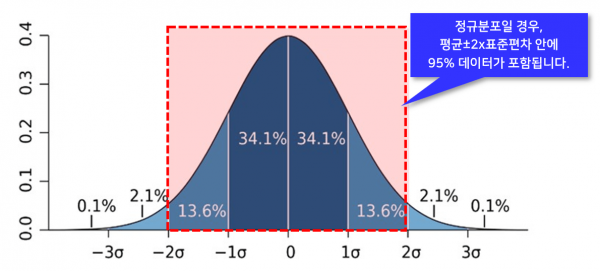




In [41]:
# Í∞Å FeatureÏóê Í¥ÄÌïú ÌÜµÍ≥Ñ Ï†ïÎ≥¥
boston_df.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT       PRICE  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

In [42]:
# 'PRICE' FeatureÏóê Í¥ÄÌïú ÌÜµÍ≥Ñ Ï†ïÎ≥¥
# std Í∞í : ÌëúÏ§ÄÌé∏Ï∞® Í∞í
# mean(ÌèâÍ∑†) Í∞íÍ≥º 50% Í∞íÏù¥ Í±∞Ïùò Ï∞®Ïù¥Í∞Ä ÎÇòÏßÄ ÏïäÎäîÎã§ -> Îç∞Ïù¥ÌÑ∞Í∞Ä Í≥®Í≥†Î£® Î∂ÑÌè¨ÎêòÏñ¥ ÏûàÏùå.
# ÌïòÏßÄÎßå std(ÌëúÏ•∞Ìé∏Ï∞®) Í∞íÏù¥ ÌÅ¨Îã§ -> Îç∞Ïù¥ÌÑ∞Í∞Ä Í≥®Í≥†Î£® Î∂ÑÌè¨ÎêòÏñ¥Îäî ÏûàÏßÄÎßå, Í∞Å Ïßë Í∞í ÏÇ¨Ïù¥Ïùò Í∞≠ Ï∞®Ïù¥Í∞Ä Ïª§ÏÑú ÎÑìÍ≤å Í∞í ÏÇ¨Ïù¥Ïùò Ï∞®Ïù¥Í∞Ä ÌÅ¨Í≤å Îç∞Ïù¥ÌÑ∞Í∞Ä Î∂ÑÌè¨Îê®
# Ï¶â, Í∑∏Î¶º ÏÉÅÏúºÎ°ú Í∑∏ÎûòÌîÑÍ∞Ä ÎÑìÍ≤å ÌëúÏ§ÄÌé∏Ï∞®Í∞Ä Í∑∏Î†§ÏßêÏùÑ Ïïå Ïàò ÏûàÎã§.
boston_df.describe()['PRICE']

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: PRICE, dtype: float64

## Îç∞Ïù¥ÌÑ∞ StandardScaling ÌõÑ ÌôïÏù∏ÌïòÍ∏∞
- Ïä§ÏºÄÏùºÎßÅÏùÑ ÌÜµÌï¥ Îã§Ï∞®ÏõêÏùò Í∞íÎì§ÏùÑ ÎπÑÍµê Î∂ÑÏÑùÌïòÍ∏∞ ÏâΩÍ≤å ÎßåÎì§Ïñ¥Ï£ºÎ©∞, ÏûêÎ£åÏùò Ïò§Î≤ÑÌîåÎ°úÏö∞(overflow)ÎÇò Ïñ∏ÎçîÌîåÎ°úÏö∞(underflow)Î•º Î∞©ÏßÄÌïúÎã§.
- ÎèÖÎ¶Ω Î≥ÄÏàòÏùò Í≥µÎ∂ÑÏÇ∞ ÌñâÎ†¨Ïùò Ï°∞Í±¥Ïàò(condition number)Î•º Í∞êÏÜåÏãúÏºú ÏµúÏ†ÅÌôî Í≥ºÏ†ïÏóêÏÑúÏùò ÏïàÏ†ïÏÑ± Î∞è ÏàòÎ†¥ ÏÜç

In [49]:
#StandardScaling ÌõÑ ÌôïÏù∏ÌïòÍ∏∞
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
boston_scaled = scaler.fit_transform(X_train)

In [50]:
boston_scaled[:3]

array([[ 1.28770177, -0.50032012,  1.03323679, -0.27808871,  0.48925206,
        -1.42806858,  1.02801516, -0.80217296,  1.70689143,  1.57843444,
         0.84534281, -0.07433689,  1.75350503],
       [-0.33638447, -0.50032012, -0.41315956, -0.27808871, -0.15723342,
        -0.68008655, -0.43119908,  0.32434893, -0.62435988, -0.58464788,
         1.20474139,  0.4301838 , -0.5614742 ],
       [-0.40325332,  1.01327135, -0.71521823, -0.27808871, -1.00872286,
        -0.40206304, -1.6185989 ,  1.3306972 , -0.97404758, -0.60272378,
        -0.63717631,  0.06529747, -0.65159505]])

In [51]:
lr_reg_scaled = LinearRegression().fit(boston_scaled, y_train)

# ‚≠ê‚≠ê‚≠ê‚≠ê‚≠êÏ†àÎåÄÎ°ú ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú TransformerÎ•º ÏÉùÏÑ±ÌïòÏßÄ ÏïäÎäîÎã§.‚≠ê‚≠ê‚≠ê‚≠ê‚≠ê
#test Îç∞Ïù¥ÌÑ∞Î•º StandardScalingÏùÑ ÌïòÎ©¥ ÏïàÎê® -> test Îç∞Ïù¥ÌÑ∞ÎßåÏùò ÌëúÏ§ÄÌé∏Ï∞®ÏôÄ Î∂ÑÌè¨Í∞Ä ÏÉùÍ∏∞Í∏∞ ÎïåÎ¨∏Ïóê
#train Îç∞Ïù¥ÌÑ∞ÏóêÏÑúÏùò scalerÎ•º ÌÜµÌï¥ ÎßåÎì§Ïñ¥ÏßÑ transformÏùÑ Í∑∏ÎåÄÎ°ú Î∞òÏòÅÌï¥ÏÑú ÏÇ¨Ïö©Ìï¥Ïïº Ìï®!!!
#scaled_test = StandardScaler().fit_transfrom(X_test)

scaled_test = scaler.transform(X_test)
y_scaled_pred = lr_reg_scaled.predict(X_test)

In [52]:
mse = mean_squared_error(y_test, y_scaled_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_scaled_pred)

print("MSE : {:.3f}".format(mse))
print("RMSE : {:.3f}".format(rmse))
print("R2 : {:.3f}".format(r2))

MSE : 307187.801
RMSE : 554.245
R2 : -4187.899


#Îã§Ìï≠ÌöåÍ∑Ä
- Îç∞Ïù¥ÌÑ∞Ïùò Ï°∞Ìï©Ìï≠Îì§Ïù¥ Îçî Ï∂îÍ∞ÄÎêòÎäî Í≤É

In [55]:
from sklearn.preprocessing import PolynomialFeatures

sample = np.arange(6).reshape(3, 2)
sample

array([[0, 1],
       [2, 3],
       [4, 5]])

In [56]:
poly = PolynomialFeatures(degree=2) # degree ÌååÎùºÎØ∏ÌÑ∞Î•º Ïù¥Ïö©Ìï¥ÏÑú nÏ∞®Ìï≠ Ï∂îÍ∞Ä
sample_ftr = poly.fit_transform(sample)
sample_ftr


array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

In [58]:
boston_poly = PolynomialFeatures(degree=2, include_bias=False) #include_bias=FalseÏùÄ ÏúÑÏóê Îç∞Ïù¥ arrayÏóêÏÑú 1Ïù¥ ÎÇòÏò§Îäî Ïó¥ÏùÑ Ï†úÍ±∞

X_train_poly = boston_poly.fit_transform(X_train)
X_train_poly.shape #shape ÌôïÏù∏ Î∞òÎìúÏãú ÌïÑÏöî

#(404, 104) -> FeatureÏùò Í∞úÏàòÍ∞Ä 13Í∞úÏóêÏÑú 104Í∞úÎ°ú Ï¶ùÍ∞Ä

(404, 104)

In [59]:
lr_reg_poly = LinearRegression().fit(X_train_poly, y_train)

In [60]:
X_test_poly = boston_poly.transform(X_test)
X_test_poly.shape # shape ÌôïÏù∏ Î∞òÎìúÏãú ÌïÑÏöî -> trainÍ≥º test Îç∞Ïù¥ÌÑ∞ ÏÑ∏Ìä∏Ïùò shapeÏùÄ Ìï≠ÏÉÅ Í∞ôÏïÑÏïº Ìï®.

(102, 104)

In [61]:
y_test_pred = lr_reg_poly.predict(X_test_poly)

test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2  = r2_score(y_test, y_test_pred)

print("Test MSE : {:.3f}".format(test_mse))
print("Test RMSE : {:.3f}".format(test_rmse))
print("Test R2 : {:.3f}".format(test_r2))


Test MSE : 14.257
Test RMSE : 3.776
Test R2 : 0.806
